In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import warnings
warnings.filterwarnings('ignore')

import text_processor as tp

In [2]:
%matplotlib inline

In [71]:
df = pd.read_csv('datasets/amazon_reviews/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [51]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [52]:
data_set = df[['reviews.text','reviews.rating']]

In [53]:
data_set.head()

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [54]:
data_set['reviews.rating'].unique()

array([3, 5, 4, 1, 2])

In [55]:
filtered_df = data_set[data_set['reviews.rating'] != 3]

In [56]:
sentiment_dict = {1:0, 2:0, 4:1, 5:1}

In [57]:
filtered_df['sentiment'] = filtered_df['reviews.rating'].map(sentiment_dict)

In [58]:
filtered_df.head()

,reviews.text,reviews.rating,sentiment
1,This kindle is light and easy to use especiall...,5,1
2,Didnt know how much i'd use a kindle so went f...,4,1
3,I am 100 happy with my purchase. I caught it o...,5,1
4,Solid entry level Kindle. Great for kids. Gift...,5,1
5,This make an excellent ebook reader. Don't exp...,5,1


In [59]:
filtered_df.groupby(filtered_df['sentiment']).count()

,reviews.text,reviews.rating,sentiment
sentiment,,,
0,117,117,117
1,4686,4686,4686


In [ ]:
# data is imbalanced so load more data

In [61]:
df1 = pd.read_csv('datasets/amazon_reviews/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [62]:
df1_copy = df1[['reviews.text','reviews.rating']]

In [63]:
filtered_df1 = df1_copy[df1_copy['reviews.rating'] < 3]

In [64]:
filtered_df1['sentiment'] = filtered_df1['reviews.rating'].map(sentiment_dict)

In [65]:
filtered_df1.count()

reviews.text      1581
reviews.rating    1581
sentiment         1581
dtype: int64

In [37]:
# load more dataset

In [66]:
df2 = pd.read_csv('datasets/amazon_reviews/1429_1.csv')

In [67]:
df2_copy = df2[['reviews.text','reviews.rating']]

In [68]:
filtered_df2 = df2_copy[df2_copy['reviews.rating'] < 3]

In [69]:
filtered_df2['sentiment'] = filtered_df2['reviews.rating'].map(sentiment_dict)

In [70]:
filtered_df2.count()

reviews.text      812
reviews.rating    812
sentiment         812
dtype: int64

In [77]:
all_dataframes = [filtered_df, filtered_df1, filtered_df2]

In [78]:
final_df = pd.concat(all_dataframes)

In [79]:
final_df.count()

reviews.text      7196
reviews.rating    7196
sentiment         7196
dtype: int64

In [80]:
final_df = final_df.rename(columns={'reviews.text':'content','reviews.rating':'rating'})

In [81]:
final_df.head()

,content,rating,sentiment
1,This kindle is light and easy to use especiall...,5.0,1
2,Didnt know how much i'd use a kindle so went f...,4.0,1
3,I am 100 happy with my purchase. I caught it o...,5.0,1
4,Solid entry level Kindle. Great for kids. Gift...,5.0,1
5,This make an excellent ebook reader. Don't exp...,5.0,1


In [82]:
final_df.groupby(final_df['sentiment']).count()

,content,rating
sentiment,,
0,2510,2510
1,4686,4686


In [ ]:
#preprocess

In [83]:
reviews_df = final_df.copy()

In [84]:
reviews_df['cleaned_text'] = reviews_df['content'].str.lower()

In [85]:
reviews_df.head()

,content,rating,sentiment,cleaned_text
1,This kindle is light and easy to use especiall...,5.0,1,this kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...,4.0,1,didnt know how much i'd use a kindle so went f...
3,I am 100 happy with my purchase. I caught it o...,5.0,1,i am 100 happy with my purchase. i caught it o...
4,Solid entry level Kindle. Great for kids. Gift...,5.0,1,solid entry level kindle. great for kids. gift...
5,This make an excellent ebook reader. Don't exp...,5.0,1,this make an excellent ebook reader. don't exp...


In [86]:
reviews_df['cleaned_text'] = reviews_df['cleaned_text'].apply(tp.expand_contractions)

In [87]:
reviews_df['cleaned_text'] = reviews_df['cleaned_text'].apply(tp.remove_special_chars, remove_digits=True)

In [88]:
reviews_df['cleaned_text'] = reviews_df['cleaned_text'].apply(tp.lemmatize_text)

In [89]:
reviews_df['cleaned_text'] = reviews_df['cleaned_text'].apply(tp.remove_stopwords)

In [90]:
reviews_df.loc[5]['content']

"This make an excellent ebook reader. Don't expect much from this device except to read basic ebooks. The good thing is it's cheap and good to read in the sun."

In [91]:
reviews_df.loc[5]['cleaned_text']

'make excellent ebook reader expect much device except read basic ebook good thing cheap good read sun'

In [92]:
reviews_df.loc[5]['sentiment']

1

In [93]:
processed_df = reviews_df.copy()

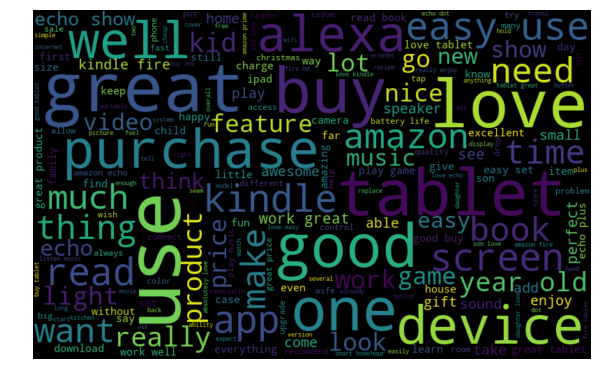

In [94]:
pos_words = ' '.join([text for text in processed_df['cleaned_text'][processed_df['sentiment'] == 1]])
pos_wordcloud = WordCloud(width=800, height=500, random_state=20, max_font_size=110).generate(pos_words)

plt.figure(figsize=(10,7))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

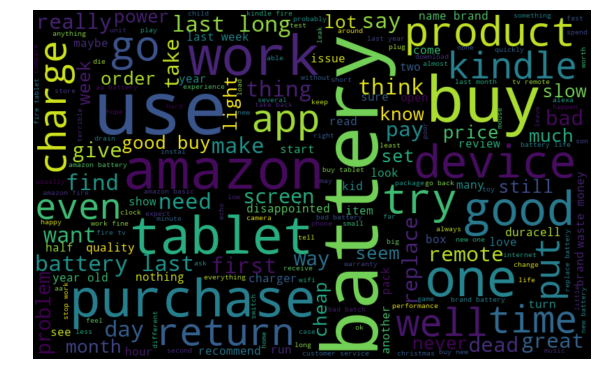

In [95]:
neg_words = ' '.join([text for text in processed_df['cleaned_text'][processed_df['sentiment'] == 0]])
neg_wordcloud = WordCloud(width=800, height=500, random_state=20, max_font_size=110).generate(neg_words)

plt.figure(figsize=(10,7))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(processed_df['cleaned_text'], 
                                                    processed_df['sentiment'], 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [97]:
print(X_train.shape)
print(X_test.shape)

(5756,)
(1440,)


In [98]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1,2),
                       max_df=1.0,
                       min_df=10,
                       max_features=300,
                       norm='l2',
                       sublinear_tf=True)

In [99]:
train_features = tfidf.fit_transform(X_train).toarray()
print(train_features.shape)

(5756, 300)


In [100]:
test_features = tfidf.transform(X_test).toarray()
print(test_features.shape)

(1440, 300)


In [101]:
train_labels = Y_train
test_labels = Y_test

In [102]:
with open('pickles/amazon/processed_df.pickle', 'wb') as output:
    pickle.dump(processed_df, output)
    
with open('pickles/amazon/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
with open('pickles/amazon/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
with open('pickles/amazon/Y_train.pickle', 'wb') as output:
    pickle.dump(Y_train, output)
    
with open('pickles/amazon/Y_test.pickle', 'wb') as output:
    pickle.dump(Y_test, output)
    
with open('pickles/amazon/train_features.pickle', 'wb') as output:
    pickle.dump(train_features, output)
    
with open('pickles/amazon/test_features.pickle', 'wb') as output:
    pickle.dump(test_features, output)
    
with open('pickles/amazon/train_labels.pickle', 'wb') as output:
    pickle.dump(train_labels, output)
    
with open('pickles/amazon/test_labels.pickle', 'wb') as output:
    pickle.dump(test_labels, output)

with open('pickles/amazon/tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)